In [77]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [59]:
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
auth = np.loadtxt('twitter_auth_key.txt', dtype=str).tolist() #Replace with your Twitter API key
client = tweepy.Client(auth)

In [68]:
def get_user_id(username):
    user = client.get_user(username=username)
    return user.data.id

In [74]:
def hindex_full(list_, scale=100000, step=50, max_depth=5, percentile=90):
    
    grades = [scale]
    for i in range(max_depth):
        scale /= step
        grades.append(scale)
        
    for g in grades:
        if np.percentile(list_, percentile) >= g:
            scale = g
            break
    else:
        scale = min(grades)
    
    hind = hindex(list_, scale) 
    
    return (hind + 1) * scale, scale

def hindex(list_, scale):
    arr = np.array(list_)
    arr = np.sort(arr)[::-1]
    
    idx = np.arange(1,len(arr)+1)*scale
    
    try:
        return np.max(np.argwhere(arr >= idx))
    except:
        return -1
    
def hindex_df(list_, scale):
    scores_arr = np.sort(np.array(list_))[::-1]
    idx_arr = np.arange(1,len(scores_arr)+1)*scale
    
    df = pd.DataFrame({
        'Scores': scores_arr,
        'Idx': idx_arr
    }).set_index('Idx').head(np.max(np.argwhere(scores_arr >= idx_arr))+2)
    
    return df

In [75]:
def calculate_authority(user, display_results=True):
    #Get the tweets
    tweets = client.get_users_tweets(get_user_id(user), max_results=50, tweet_fields='public_metrics', exclude=['retweets', 'replies'])
    
    #Get the scores
    scores = []
    for tweet in tweets.data:
        scores.append(sum(tweet.public_metrics.values()))
    
    #Get the hindex
    score, scale = hindex_full(scores)
    
    if display_results:
        print(f'User: {user}')
        print(f'Score: {score}')
        print(f'Scale: {scale}')
        print()
        print(f'Of their last {len(scores)} tweets, {user} has {score / scale} tweets with engagement >= {score}:')
        print()
        print(hindex_df(scores, scale))
        
        plt.plot(scores[::-1])
        plt.xlabel('Most recent tweets (50 is most recent)')
        plt.ylabel('Engagement')
        plt.show()
    
    return score

User: jack
Score: 14000.0
Scale: 2000.0

Of their last 50 tweets, jack has 7.0 tweets with engagement >= 14000.0:

         Scores
Idx            
2000.0    91271
4000.0    33672
6000.0    26854
8000.0    24526
10000.0   23231
12000.0   17667
14000.0   16975
16000.0   14197


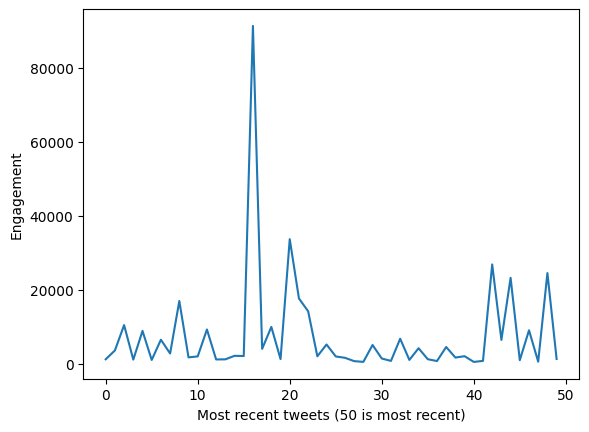

14000.0

In [76]:
calculate_authority('jack')